# Data Visualization (1 hour)

Reference: [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/index.html)

It is always good practice to import modules at the beginning of a notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

* Commonly use a sub-library called [matplotlib.pyplot](https://matplotlib.org/stable/tutorials/introductory/pyplot.html).
* We will use the plt.style directive to choose appropriate aesthetic styles for our figures. Find the list of matplotlib styles [here](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html).
* The Jupyter Notebook will render plots inline by default.

### Note: 

In our Jupyter Notebook example, running the cell should generate the figure directly below the code. The figure is also included in the Notebook document for future viewing. However, other Python environments like an interactive Python session started from a terminal or a Python script executed via the command line require an additional command to display the figure.

Instruct `matplotlib` to show a figure:

In [ ]:
plt.show()

This command can also be used within a Notebook - for instance, to display multiple figures if several are created by a single cell.

# Plotting data directly from a Pandas DataFrame

## Read in data

We'll use pandas read_csv function to read in our data.

In [2]:
periodic_table = pd.read_csv('https://gist.githubusercontent.com/GoodmanSciences/c2dd862cd38f21b0ad36b8f96b4bf1ee/raw/1d92663004489a5b6926e944c1b3d9ec5c40900e/Periodic%2520Table%2520of%2520Elements.csv')

We will use this DataFrame to try some of our plotting functions. We will start with two variables in the datasets, AtomicNumber and AtomicRadius. 

First of all, we notice there are some missing atomic radius data. We would like to drop rows with missing data in AtomicRadius column:

In [3]:
pt_d = periodic_table.dropna(subset=['AtomicRadius'])

## Pandas built-in plotting methods

There are multiple packages we can use for plotting. Pandas has some built-in object-oriented methods we can try first.

* By default, `DataFrame.plot` plots with the rows as the X axis.
* We can transpose the data in order to plot multiple series.

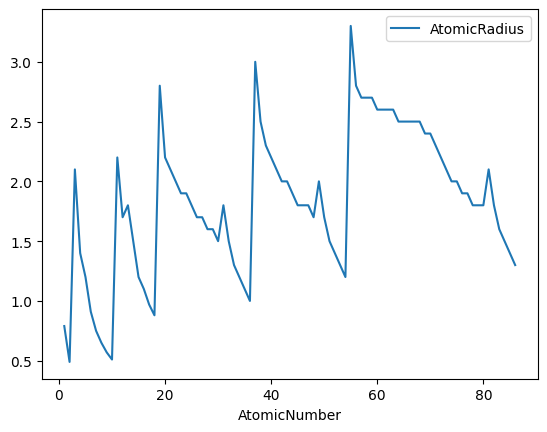

In [4]:
pt_d.plot('AtomicNumber', 'AtomicRadius');


We can change the plt settings to add more information and get prettier plots: 
* alter plotting styles (line vs. scatter)
* add a title
* adjust the axis ranges and labels
* increase font size
* add gridlines
* adjust the aspect ratio
* ...

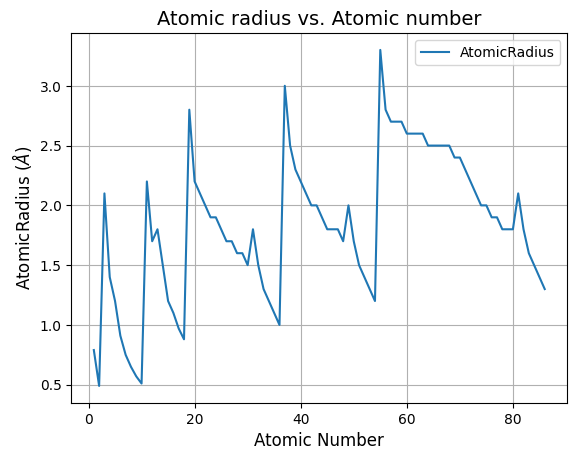

In [5]:
pt_d.plot('AtomicNumber', 'AtomicRadius')
plt.xlabel('Atomic Number', fontsize=12)
plt.ylabel(r'AtomicRadius ($\AA$)', fontsize=12)
plt.title('Atomic radius vs. Atomic number', fontsize=14)
plt.grid();

### Extras:

Here we used TeX notation to create the unit "$\AA$" of atomic radius. TeX can be used to generate mathematical expressions, symbols, and Greek letters for figures. Any string can be processed as Mathtext by placing the string inside a pair of dollar signs '$'.

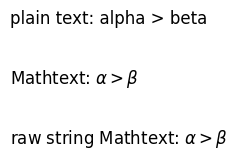

In [6]:
fig = plt.figure(figsize=(3, 3))
ax = plt.axes(visible=False)
fig.text(.2, .7, "plain text: alpha > beta", fontsize=12)
fig.text(.2, .5, "Mathtext: $\\alpha > \\beta$", fontsize=12)
fig.text(.2, .3, r"raw string Mathtext: $\alpha > \beta$", fontsize=12);

# Using Matplotlib for data visualization

Matplotlib is a multi-platform data visualization library built on NumPy arrays, and designed to work with the broader SciPy stack. A potentially confusing feature of Matplotlib is its dual interfaces: a convenient MATLAB-style state-based interface, and a more powerful object-oriented interface. We'll quickly highlight the differences between the two here.

## MATLAB-style Interface: `plt`

Matplotlib was originally written as a Python alternative for MATLAB users, and much of its syntax reflects that fact. The MATLAB-style tools are contained in the pyplot (plt) interface.

### Call `plt.plot` function to plot MeltingPoint and BoilingPoint vs. AtomicNumber directly

In [7]:
# drop rows with missing data in either MeltingPoint or BoilingPoint
pt_mb = periodic_table.dropna(subset=['MeltingPoint', 'BoilingPoint'])
pt_mb.shape

(97, 28)

The function `plt.figure` creates a space into which we will place all of our plots. The parameter `figsize` tells Python how big to make this space.

If we want to create a single figure with multiple lines, we can simply call the `plot` function multiple times.

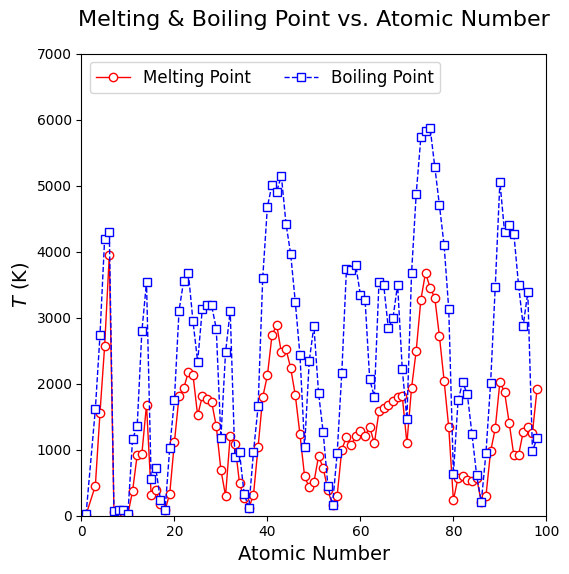

In [8]:
plt.figure(figsize=(6, 6))
plt.plot(pt_mb['AtomicNumber'], pt_mb['MeltingPoint'], 'o-r', label='Melting Point', 
         linewidth=1, markerfacecolor='white') # Adjust line/marker colors and styles; label each line
plt.plot(pt_mb['AtomicNumber'], pt_mb['BoilingPoint'], 's--b', label='Boiling Point', 
         linewidth=1, markerfacecolor='white')
plt.xlim(0, 100) # Adjust axes limits
plt.ylim(0, 7000)
plt.xlabel('Atomic Number', fontsize=14) # Add axes labels
plt.ylabel('$T$ (K)', fontsize=14)
plt.legend(loc='upper left', fontsize=12, ncol=2) # Create and customize plot legend
plt.title('Melting & Boiling Point vs. Atomic Number', fontsize=16, pad=20); # Add a title

* Specify the color, linestyle and markers with a format string '[marker][line][color]', e.g. 'o-r' for red solid line with circles. 
    * Format strings are just an abbreviation for quickly setting basic line properties. All of these and more can also be controlled by keyword arguments.
    * Here are possible values for [linestyle](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle) and [markers](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers).

* Specify the label of each line using the `label` keyword of the `plot` function, and use Matplotlib built-in method `plt.legend` to create a plot legend that labels each line type.

* Matplotlib does a decent job of choosing default axes limits for your plot, but sometimes it's nice to have finer control. The most basic way to adjust axis limits is to use the `plt.xlim` and `plt.ylim` methods.

* `pad` controls the offset of the title from the top of the Axes, in points.

### Exercise 1:

What difference does it make in our plot if we don’t use `dropna` to preprocess the data?

In [9]:
periodic_table[['AtomicNumber', 'MeltingPoint']].head()

,AtomicNumber,MeltingPoint
0,1,14.175
1,2,NaN
2,3,453.850
3,4,1560.150
4,5,2573.150


In [10]:
pt_m = periodic_table.dropna(subset=['MeltingPoint'])

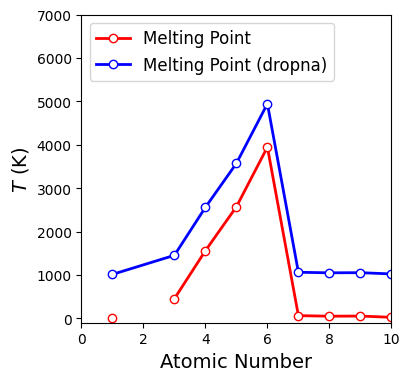

In [11]:
plt.figure(figsize=(4, 4))
plt.plot(periodic_table['AtomicNumber'], periodic_table['MeltingPoint'], 'o-r', label='Melting Point', 
         linewidth=2, markerfacecolor='white')
plt.plot(pt_m['AtomicNumber'], pt_m['MeltingPoint']+1000, 'o-b', label='Melting Point (dropna)', 
         linewidth=2, markerfacecolor='white')
plt.xlim(0, 10)
plt.ylim(-100, 7000)
plt.xlabel('Atomic Number', fontsize=14)
plt.ylabel('$T$ (K)', fontsize=14)
plt.legend(loc='upper left', fontsize=12);

There will be a visible gap in the plot wherever a value is missing!

### Save your plot to a file

If you are satisfied with the plot you see you may want to save it to a file, perhaps to include it in a publication. There is a function in the `plt` module that accomplishes this: [savefig](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html). Calling this function, e.g. with

In [ ]:
plt.savefig('my_figure.png')

will save the current figure to the file `my_figure.png`. The file format will automatically be deduced from the file name extension (other formats are pdf, ps, eps and svg).

Note that functions in `plt` refer to a global figure variable and after a figure has been displayed to the screen (e.g. with `plt.show`) matplotlib will make this variable refer to a new empty figure. Therefore, make sure you call `plt.savefig` before the plot is displayed to the screen, otherwise you may find a file with an empty plot.

When using DataFrames, data is often generated and plotted to screen in one line. In addition to using `plt.savefig`, we can save a reference to the current figure in a local variable (with `plt.gcf`) and call the `savefig` class method from that variable to save the figure to file.

In [ ]:
pt_d.plot('AtomicNumber', 'AtomicRadius')
fig = plt.gcf() # get current figure
fig.savefig('my_figure.png')

To find out more information about `plot` function, take a look at the built-in documentation for it.

In [ ]:
plt.plot?

### A simple way to plot 3D data by varying the size/color of the points with z

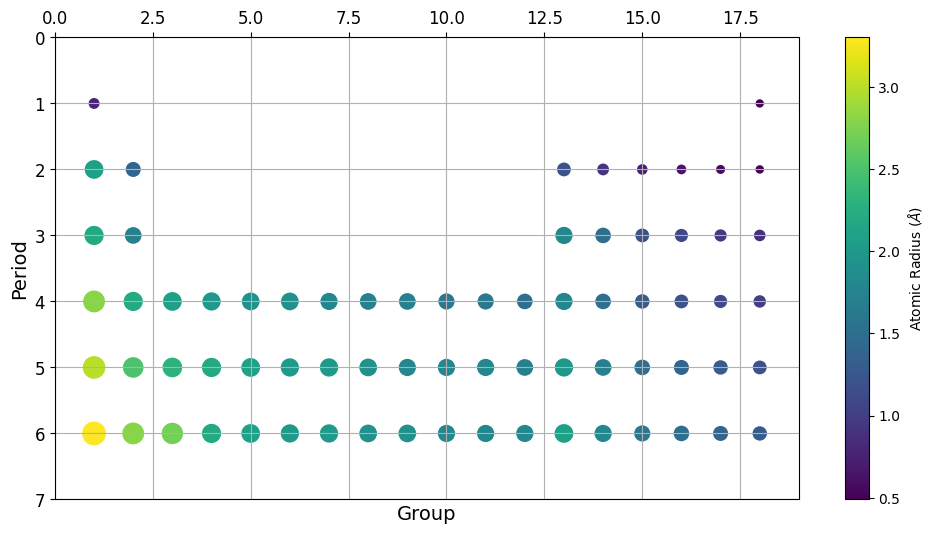

In [12]:
# plot Period-Group-AtomicRadius, with the size of the points propotional to atomic radius.
plt.figure(figsize=(12, 6))
plt.scatter(pt_d['Group'], pt_d['Period'], 
            s=pt_d['AtomicRadius']*100, c=pt_d['AtomicRadius'], edgecolor='white')
plt.xlim(0, pt_d['Group'].max()+1)
plt.ylim(pt_d['Period'].max()+1, 0)
plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False, labelsize=12)
plt.xlabel('Group', fontsize=14)
plt.ylabel('Period', fontsize=14)
plt.colorbar(label=r'Atomic Radius ($\AA$)')
plt.grid();

* If for some reason you'd like either axis to be displayed in reverse, you can simply reverse the order of the arguments.
* An effective way to determine accurate axis limits is to use aggregate functions `min` and `max`.

### Multiple subplots using `plt.subplot`

Aligned columns or rows of subplots are a common-enough need that Matplotlib has several convenience routines that make them easy to create. The lowest level of these is `plt.subplot`, which creates a single subplot within a grid. This command takes three integer arguments—the number of rows, the number of columns, and the index of the plot to be created in this schem (starting from 1), which runs from the upper left to the bottom right. 

Plot MeltingPoint and BoilingPoint vs. AtomicNumber in two subplots:

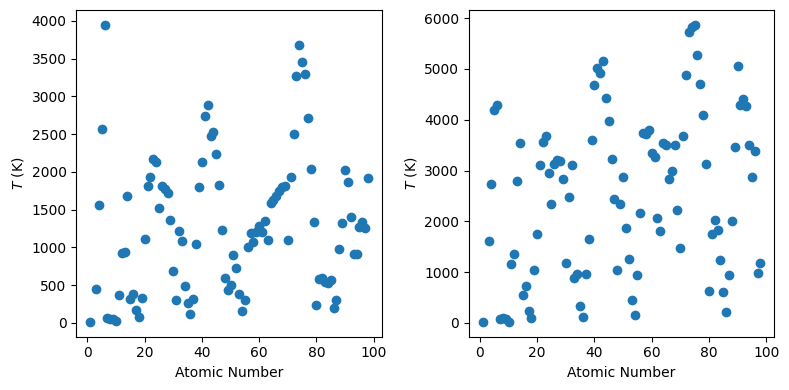

In [13]:
# create a plot figure
plt.figure(figsize=(8, 4))

# create the first of two panels and set current axis
plt.subplot(1, 2, 1) # (rows, columns, panel number)
plt.scatter(pt_mb['AtomicNumber'], pt_mb['MeltingPoint'])
plt.xlabel('Atomic Number')
plt.ylabel('$T$ (K)')

# create the second panel and set current axis
plt.subplot(1, 2, 2)
plt.scatter(pt_mb['AtomicNumber'], pt_mb['BoilingPoint'])
plt.xlabel('Atomic Number')
plt.ylabel('$T$ (K)')

plt.tight_layout()  # adjust layout to prevent overlap
plt.show()

It is important to note that this interface keeps track of the "current" figure and axes, which are where all plt commands are applied. You can get a reference to these using the `plt.gcf` (get current figure) and `plt.gca` (get current axes) routines. 

While this stateful interface is fast and convenient for simple plots, it is easy to run into problems. For example, once the second panel is created, going back and adding something to the first panel will be a bit clunky. Fortunately, there is a better way - the object-oriented interface.

### Exercise 2: 

Improve the above subplots with MATLAB-style interface:

* change the x range to be min(x) to max(x)
* change the y range to be min(y) to max(y)
* increase the font size of axis label to 14
* change the color of plotting to red, transparency to 50%
* add titles
* change the layout so the plots on top of one another
* make sure the subplots don't overlap

You can access the `plt` documentation [here](https://matplotlib.org/stable/api/pyplot_summary.html).

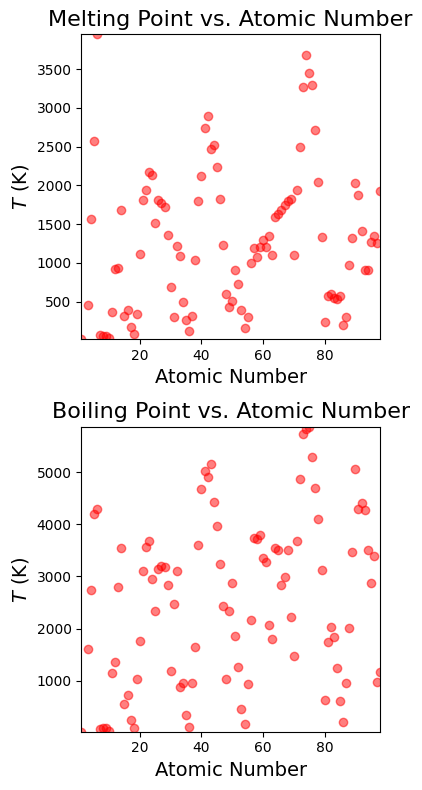

In [14]:
plt.figure(figsize=(4, 8))

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.scatter(pt_mb['AtomicNumber'], pt_mb['MeltingPoint'], color='red', alpha=0.5)
plt.xlim(pt_mb['AtomicNumber'].min(), pt_mb['AtomicNumber'].max())
plt.ylim(pt_mb['MeltingPoint'].min(), pt_mb['MeltingPoint'].max())
plt.xlabel('Atomic Number', fontsize=14)
plt.ylabel('$T$ (K)', fontsize=14)
plt.title('Melting Point vs. Atomic Number', fontsize=16)

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.scatter(pt_mb['AtomicNumber'], pt_mb['BoilingPoint'], color='red', alpha=0.5)
plt.xlim(pt_mb['AtomicNumber'].min(), pt_mb['AtomicNumber'].max())
plt.ylim(pt_mb['BoilingPoint'].min(), pt_mb['BoilingPoint'].max())
plt.xlabel('Atomic Number', fontsize=14)
plt.ylabel('$T$ (K)', fontsize=14)
plt.title('Boiling Point vs. Atomic Number', fontsize=16)

plt.tight_layout()  # adjust layout to prevent overlap
plt.show()

## Object-oriented Interface: `Figure` and `Axes`

The object-oriented interface works well with those more complicated situations. Rather than depending on some notion of an "active" figure or axes, in the object-oriented interface the plotting functions are methods of explicit `Figure` and `Axes` objects.

### Multiple subplots using object-oriented interface

Use the equivalent object-oriented command `fig.add_subplot` to re-create the previous plot. `add_subplot` method places each subplot into the figure. Each subplot is stored in a different variable (`ax1`, `ax2`, `ax3`). Once a subplot is created, the axes can be titled using the `set_xlabel` command (or `set_ylabel`). Here are our plots side by side:

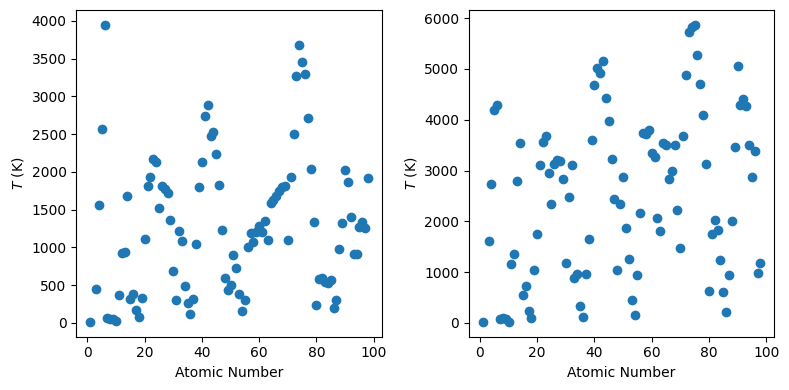

In [15]:
fig = plt.figure(figsize=(8, 4))
ax1, ax2 = fig.add_subplot(1, 2, 1), fig.add_subplot(1, 2, 2)

ax1.scatter(pt_mb['AtomicNumber'], pt_mb['MeltingPoint'])
ax1.set_xlabel('Atomic Number')
ax1.set_ylabel('$T$ (K)')

ax2.scatter(pt_mb['AtomicNumber'], pt_mb['BoilingPoint'])
ax2.set_xlabel('Atomic Number')
ax2.set_ylabel('$T$ (K)')

plt.tight_layout();


Simplify the code for creating subplots by using a `for` loop:

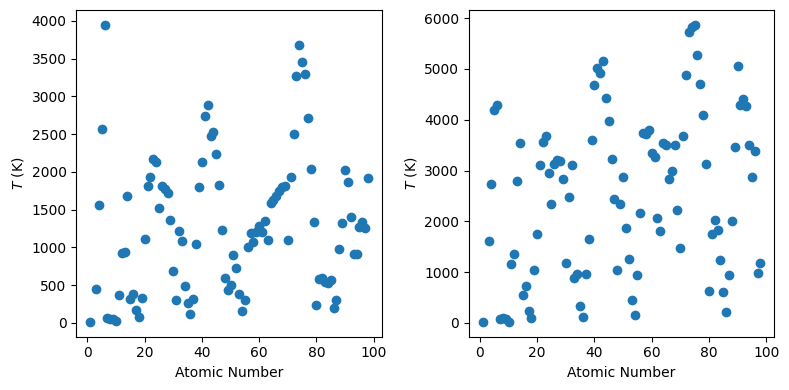

In [16]:
pt_mb_subet = pt_mb[['AtomicNumber', 'MeltingPoint', 'BoilingPoint']]
fig = plt.figure(figsize=(8, 4))

for i in range(1, 3):
    ax = fig.add_subplot(1, 2, i)
    ax.scatter(pt_mb_subet.iloc[:, 0], pt_mb_subet.iloc[:, i])
    ax.set_xlabel('Atomic Number')
    ax.set_ylabel('$T$ (K)')

plt.tight_layout();

Alternatively, `plt.subplots` can create a large grid of subplots in one go (note the `s` at the end of `subplots`).

Also, use the `Axes.set` method to set limits, labels, and titles at once.

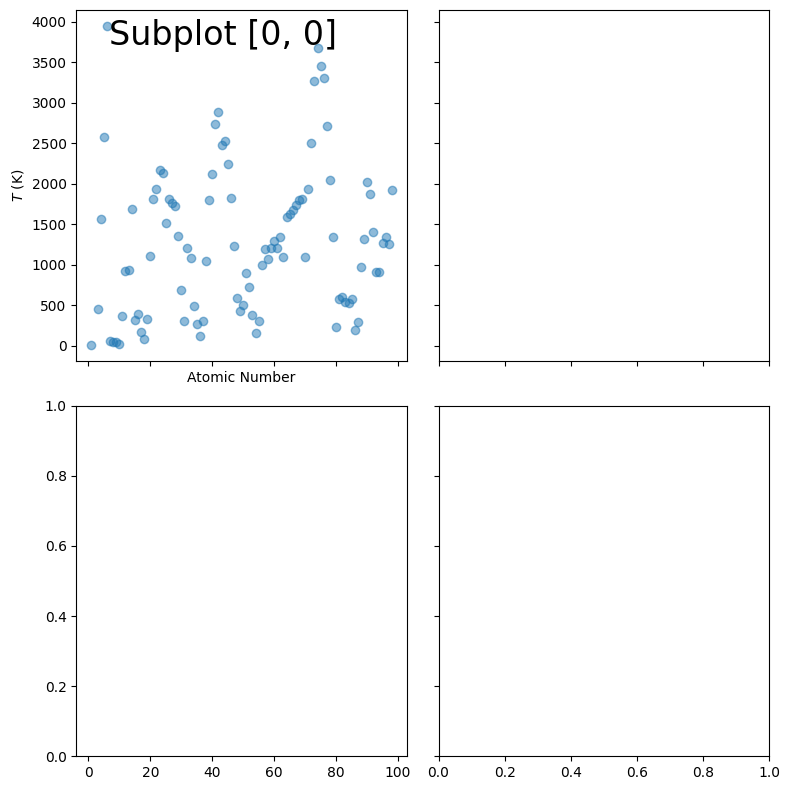

In [17]:
fig, ax = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(8, 8))

ax[0, 0].scatter(pt_mb['AtomicNumber'], pt_mb['MeltingPoint'], alpha=0.5)
ax[0, 0].set(xlabel='Atomic Number', ylabel='$T$ (K)')
ax[0, 0].text(0.1, 0.9, 'Subplot [0, 0]', fontsize=24, transform = ax[0, 0].transAxes)

'''
repeat plotting for other subplots: ax[0,1], ax[1,0], ax[1,1]
'''

fig.tight_layout();

The default transform specifies that text is in data coords, alternatively, you can specify text in axis coords ((0, 0) is lower-left and (1, 1) is upper-right) with `transform = Axes.transAxes`

Use `for` loop!

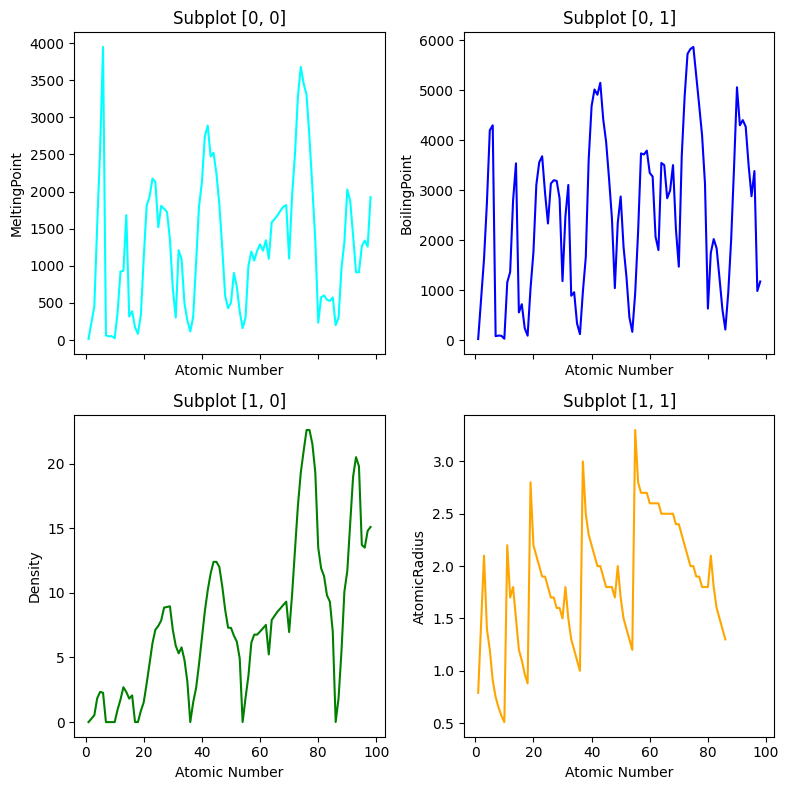

In [18]:
columns = ['AtomicNumber', 'MeltingPoint', 'BoilingPoint', 'Density', 'AtomicRadius']
color = ['cyan', 'blue', 'green', 'orange']
pt_mb_subet = pt_mb[columns]
fig, ax = plt.subplots(2, 2, sharex='col', figsize=(8, 8))

for i in range(2):
    for j in range(2):
        ax[i, j].plot(pt_mb_subet.iloc[:, 0], pt_mb_subet.iloc[:, i*2+j+1], color=color[i*2+j])
        ax[i, j].set(xlabel='Atomic Number', ylabel=columns[i*2+j+1], title=f'Subplot [{i}, {j}]')

fig.tight_layout();

### Exercise 3:

Improve the above subplots with object-oriented interface:

* change to scatter plot
* change the x range to be min(x) to max(x)
* change the y range to be min(y) to max(y)
* increase the font size of axis label to 12
* change the transparency of plotting to 50%
* add titles
* make sure the subplots don't overlap

You can access the `figure` documentation [here](https://matplotlib.org/stable/api/figure_api.html).

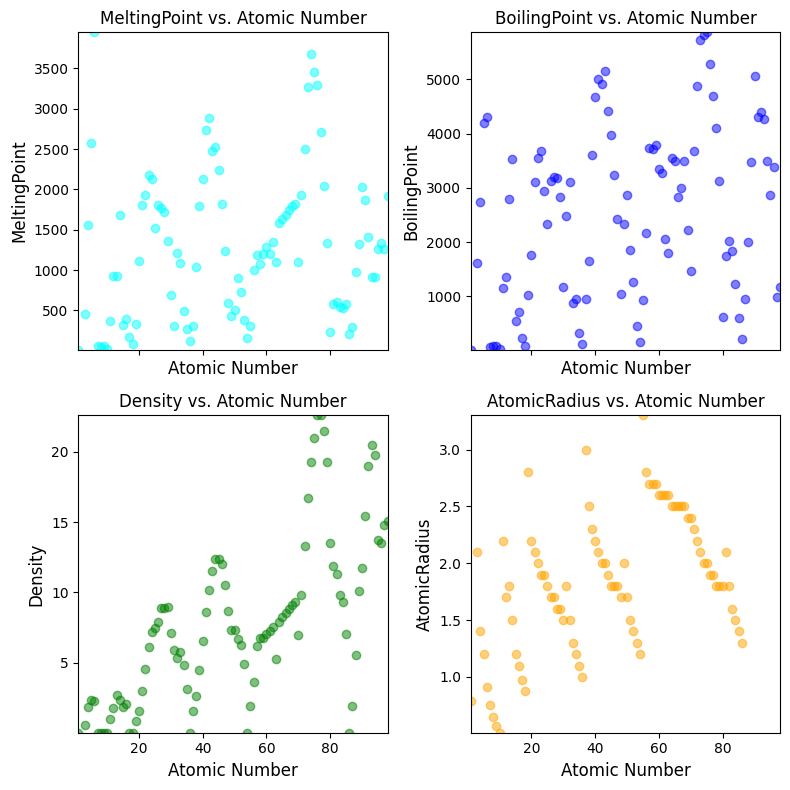

In [19]:
columns = ['AtomicNumber', 'MeltingPoint', 'BoilingPoint', 'Density', 'AtomicRadius']
color = ['cyan', 'blue', 'green', 'orange']
pt_mb_subet = pt_mb[columns]
fig, ax = plt.subplots(2, 2, sharex='col', figsize=(8, 8))

for i in range(2):
    for j in range(2):
        ax[i, j].scatter(pt_mb_subet.iloc[:, 0], pt_mb_subet.iloc[:, i*2+j+1], color=color[i*2+j], alpha=0.5)
        ax[i, j].set_xlabel('Atomic Number', fontsize=12)
        ax[i, j].set_ylabel(columns[i*2+j+1], fontsize=12)
        ax[i, j].set(xlim=[pt_mb_subet.iloc[:, 0].min(), pt_mb_subet.iloc[:, 0].max()], 
                     ylim=[pt_mb_subet.iloc[:, i*2+j+1].min(), pt_mb_subet.iloc[:, i*2+j+1].max()], 
                     title=f'{columns[i*2+j+1]} vs. Atomic Number')
        
fig.tight_layout();

Please also explore how [`imshow`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) works.

## Histograms

A simple histogram can be a great first step in understanding a dataset. Matplotlib can create a basic histogram using the command `plt.hist()`.

Plot a histogram showing number of elements discovered every decade from 1700 to 2020:

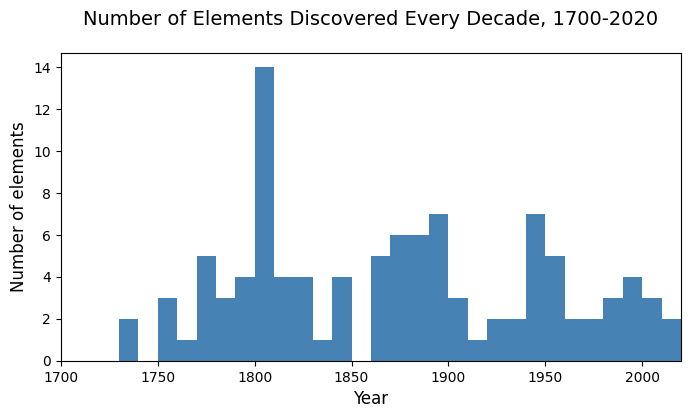

In [20]:
pt_year = periodic_table.dropna(subset=['Element', 'Year'])
plt.figure(figsize=(8, 4))
plt.hist(pt_year['Year'], bins=32, range=(1700,2020), color='steelblue', edgecolor='none')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of elements', fontsize=12)
plt.xlim(1700, 2020)
plt.title('Number of Elements Discovered Every Decade, 1700-2020', fontsize=14, pad=20);

Matplotlib can create 2D histograms using [`plt.hist2d`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist2d.html).

## Extras: Matplotlib Gotchas

While most `plt` functions translate directly to `ax` methods (such as `plt.plot` → `ax.plot`, `plt.legend` → `ax.legend`, etc.), this is not the case for all commands. In particular, functions to set limits, labels, and titles are slightly modified. For transitioning between MATLAB-style functions and object-oriented methods, make the following changes:

* `plt.xlabel` → `ax.set_xlabel`

* `plt.ylabel` → `ax.set_ylabel`

* `plt.xlim` → `ax.set_xlim`

* `plt.ylim` → `ax.set_ylim`

* `plt.title` → `ax.set_title`

In the object-oriented interface to plotting, rather than calling these functions individually, it is often more convenient to use the `ax.set` method to set all these properties at once:

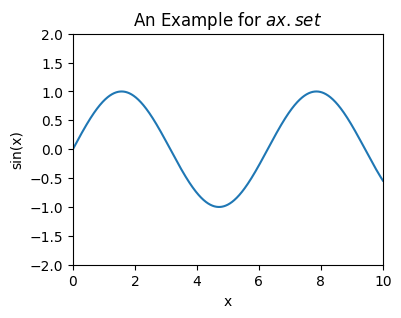

In [21]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='An Example for $ax.set$');

## Extras: Seaborn

As Matplotlib is not designed for use with Pandas DataFrames, we must extract each Series and often concatenate them together into the right format in order to visualize data from a Pandas DataFrame. It would be nicer to have a plotting library that can intelligently use the DataFrame labels in a plot, such as [Seaborn](http://seaborn.pydata.org/), which has a lot of built-in styles for very high-quality plots.

Here we show a simple example of heatmap plotted by Seaborn.

In [ ]:
import seaborn as sns

fig = plt.figure(figsize=(6,6))
heatmap_matrix = periodic_table.pivot('AtomicRadius', 'NumberofElectrons', 'MeltingPoint')
h = sns.heatmap(heatmap_matrix, cmap='BuPu')
h.set_title("Heatmap of MeltingPoint-Density and AtomicRadius")